# Please ignore the below block of code.
Just a custom code block to run my tensorflow with gpu support.

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


# Code Starts Here

### Import Data

In [2]:
import pandas as pd

df = pd.read_csv("https://cocl.us/concrete_data")
df.head(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89


### Check For Null Values

In [3]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64



Since there are no null values we can move forward with creating features and target vectors.

In [4]:
X = df.drop("Strength", axis=1)
y = df.loc[:, "Strength"]

X.shape, y.shape

((1030, 8), (1030,))

### Normalizing Data

In [5]:
X_norm = (X - X.mean()) / X.std()
X_norm.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [6]:
X_norm.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,2.828374e-15,1.379695e-17,4.139084e-17,1.214131e-15,8.278168e-17,6.553550e-15,1.226549e-14,7.588320e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.714421e+00,-8.564718e-01,-8.467326e-01,-2.798851e+00,-1.038638e+00,-2.211064e+00,-2.239829e+00,-7.070160e-01
25%,-8.496407e-01,-8.564718e-01,-8.467326e-01,-7.805147e-01,-1.038638e+00,-5.262618e-01,-5.317114e-01,-6.120340e-01
50%,-7.911350e-02,-6.014861e-01,-8.467326e-01,1.607513e-01,3.269920e-02,-6.326279e-02,7.383152e-02,-2.795973e-01
75%,6.586406e-01,8.003558e-01,1.001791e+00,4.885554e-01,6.688058e-01,7.264077e-01,6.288606e-01,1.636517e-01
max,2.476712e+00,3.309068e+00,2.279976e+00,3.064159e+00,4.351528e+00,2.213149e+00,2.731735e+00,5.055221e+00


### Split the data in train and test

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 8), (309, 8), (721,), (309,))

### Create the model

In [8]:
import tensorflow.keras as keras

In [9]:
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(10, activation="relu", input_shape=(X_norm.shape[1],)))
    model.add(keras.layers.Dense(10, activation="relu"))
    model.add(keras.layers.Dense(10, activation="relu"))
    model.add(keras.layers.Dense(1))
    
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model

In [10]:
model = build_model()

model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
23/23 [==============================] - 0s 3ms/step - loss: 1561.4335
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 1538.6750
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 1507.3586
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 1460.7021
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 1387.7565
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 1274.8921
Epoch 7/50
23/23 [==============================] - 0s 3ms/step - loss: 1111.2944
Epoch 8/50
23/23 [==============================] - 0s 3ms/step - loss: 906.9627
Epoch 9/50
23/23 [==============================] - 0s 3ms/step - loss: 693.3957
Epoch 10/50
23/23 [==============================] - 0s 3ms/step - loss: 510.0779
Epoch 11/50
23/23 [==============================] - 0s 3ms/step - loss: 390.4980
Epoch 12/50
23/23 [==============================] - 0s 3ms/step - loss: 318.9883
Epoch 13/50
23/23 

### Calculating Mean Squared Error

In [11]:
from sklearn.metrics import mean_squared_error

predicted_y = model.predict(X_test)
mse = mean_squared_error(y_test, predicted_y)
print(f"Test MSE: {mse}")

Test MSE: 117.17475582738781


### Since we have to create a list of 50 MSEs putting everything in a function

In [12]:
def do_n_times(n=50):
    mse_list = []
    for index in range(n):
        # split data
        X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3)
        
        # build model
        model = build_model()
        
        # train model
        model.fit(X_train, y_train, epochs=50, verbose=0)
        
        # predict test set
        predicted_y = model.predict(X_test)
        
        # get MSE for the model
        mse = mean_squared_error(y_test, predicted_y)
        print(f"MSE {index}: {mse}")
        
        # append to list
        mse_list.append(mse)
    return mse_list

In [13]:
mse_list = do_n_times(50)

MSE 0: 119.68357696498009
MSE 1: 99.03148627554087
MSE 2: 150.4686998899666
MSE 3: 105.81800292597235
MSE 4: 137.453815427484
MSE 5: 113.76812487757847
MSE 6: 154.58103320398922
MSE 7: 132.7454314639462
MSE 8: 135.35592880354204
MSE 9: 106.65414090441001
MSE 10: 134.21301455162188
MSE 11: 72.77610042176372
MSE 12: 153.8795382040791
MSE 13: 134.9185765235877
MSE 14: 92.73476695686242
MSE 15: 136.7223447195823
MSE 16: 135.76976022504527
MSE 17: 136.69527922105416
MSE 18: 131.99446716387058
MSE 19: 140.87148790570333
MSE 20: 115.495866840254
MSE 21: 113.5748723365569
MSE 22: 119.63646326855688
MSE 23: 118.98085880972316
MSE 24: 141.7321215356206
MSE 25: 147.3947221623905
MSE 26: 122.86645217285097
MSE 27: 139.97907415823093
MSE 28: 144.6599209755329
MSE 29: 148.7385655900827
MSE 30: 149.23109971237875
MSE 31: 120.30612265356783
MSE 32: 138.5128109269302
MSE 33: 143.86919314738657
MSE 34: 126.19587144489637
MSE 35: 105.77239355032839
MSE 36: 117.74496630306992
MSE 37: 146.88054135631077
MS

### Average and Standard Deviation of MSE

In [14]:
import numpy as np
print(f"Average of MSEs: {np.mean(mse_list)}")
print(f"Standard Deviation MSEs: {np.std(mse_list)}")


Average of MSEs: 129.38521077356685
Standard Deviation MSEs: 18.902260162285796


### Plot different MSEs

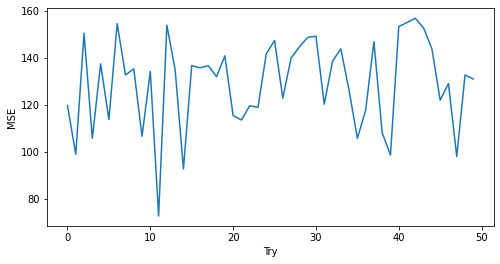

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(mse_list)
plt.xlabel("Try")
plt.ylabel("MSE")

plt.show()

## How does the mean of the mean squared errors compare to that from Step B?

Below picture shows the results from part B:
- Avg MSE: 359.07
- Std MSE: 83.00

![title](part_b_results.png)

The Avg. MSE has decreased from 359.07 to 129.39, and the Standard Deviation in the MSE has reduced from 83.00 to 18.90.<br>
The model has become more accurate and consistent by adding 2 more hidden layers.